In [8]:
#libraries
# Data
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesing & modelling 
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [84]:
# import data
# ==============================================================================
data = pd.read_csv("COAD.csv")
print(data.describe())
print(data.info())


           target          A1BG      A1BG-AS1           A1CF           A2M  \
count  415.000000    415.000000    415.000000     415.000000  4.150000e+02   
mean     0.783133   4345.253012   5661.816867   87793.448193  9.888241e+05   
std      0.412609   4104.673146   4587.054396   83066.861949  1.186324e+06   
min      0.000000     76.000000    228.000000     287.000000  1.655800e+04   
25%      1.000000   1990.000000   2556.500000   23551.000000  2.956780e+05   
50%      1.000000   3402.000000   4390.000000   61738.000000  5.582670e+05   
75%      1.000000   5444.000000   7618.500000  126260.500000  1.240981e+06   
max      1.000000  43913.000000  40223.000000  412568.000000  1.055509e+07   

             A2M-AS1          A2ML1        A2MP1     A3GALT2         A4GALT  \
count     415.000000     415.000000   415.000000  415.000000     415.000000   
mean    27109.043373    4449.518072   632.378313   39.503614   33238.773494   
std     28002.556534   35672.625175   805.151328   74.083250

In [85]:
data

,target,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,1,1940,3414,280461,504369,17407,352,259,0,9320,...,167117,427430,22765,79222,132973,758,182067,668585,307598,180443
1,1,2389,2504,3863,490369,14123,0,220,48,28966,...,160460,461662,17714,82843,133411,288,82931,658794,333283,141272
2,1,11132,16088,116055,7290188,133197,234,3730,143,144259,...,99997,218272,30082,95000,189045,571,167817,2059903,474270,167492
3,1,1985,892,54065,166961,6662,0,24,0,6558,...,57975,96666,6428,31019,35796,70,46934,236254,70268,64291
4,1,763,2271,18771,62964,4645,0,30,0,1590,...,16072,37712,2293,9069,20857,199,13873,466422,75607,24480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1,3054,2576,115764,493072,11960,8,420,60,13248,...,54171,126283,9542,32394,81350,339,60699,384359,112408,89682
411,1,14310,16644,64124,4883766,99562,251285,3727,149,290478,...,120774,304703,15515,63378,113558,598,176298,1956402,320730,155308
412,1,1202,1498,46430,300920,7610,1814,0,0,7066,...,51039,99020,2962,18191,47548,0,86957,218681,66733,106071
413,1,1774,4890,84582,183976,4557,7118,51,22,2521,...,73787,150409,9795,46086,103497,0,94178,630059,417290,86620


In [26]:
data['target']

0      1
1      1
2      1
3      1
4      1
      ..
410    1
411    1
412    1
413    1
414    1
Name: target, Length: 415, dtype: int64

In [11]:
target = data['target'].tolist()

c:\python_env\biologia_computacional\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\python_env\biologia_computacional\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


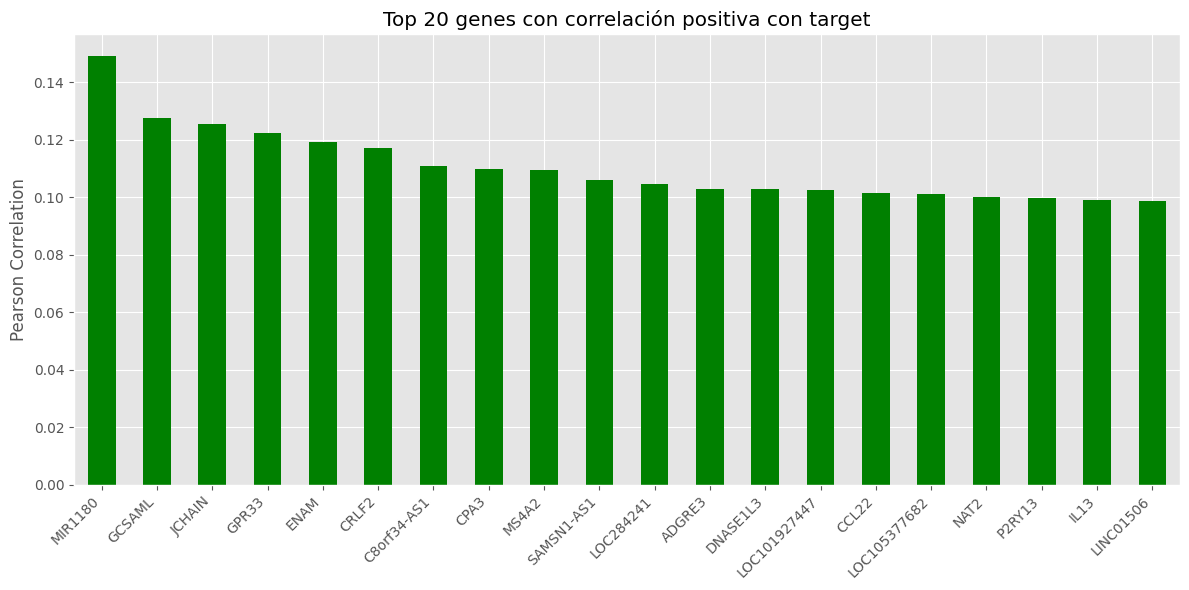


Top 20 correlaciones positivas con target:
MIR1180         0.149136
GCSAML          0.127372
JCHAIN          0.125259
GPR33           0.122259
ENAM            0.119304
CRLF2           0.116917
C8orf34-AS1     0.110929
CPA3            0.109651
MS4A2           0.109314
SAMSN1-AS1      0.105846
LOC284241       0.104456
ADGRE3          0.102957
DNASE1L3        0.102911
LOC101927447    0.102482
CCL22           0.101547
LOC105377682    0.101105
NAT2            0.100020
P2RY13          0.099738
IL13            0.098846
LINC01506       0.098772
dtype: float64


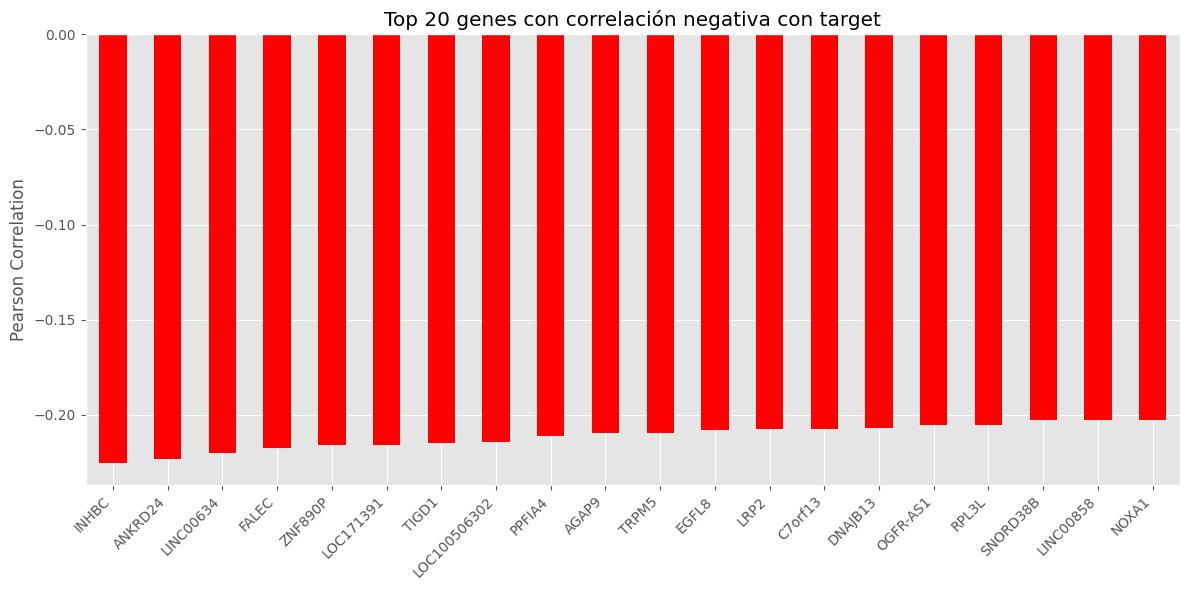


Top 20 correlaciones negativas con target:
INHBC          -0.225526
ANKRD24        -0.223187
LINC00634      -0.220053
FALEC          -0.217262
ZNF890P        -0.216128
LOC171391      -0.215967
TIGD1          -0.214908
LOC100506302   -0.214273
PPFIA4         -0.211302
AGAP9          -0.209673
TRPM5          -0.209542
EGFL8          -0.207960
LRP2           -0.207615
C7orf13        -0.207356
DNAJB13        -0.206803
OGFR-AS1       -0.205538
RPL3L          -0.205409
SNORD38B       -0.202976
LINC00858      -0.202974
NOXA1          -0.202951
dtype: float64


In [20]:
import matplotlib.pyplot as plt

# Correlación de cada gen con target
corr_target = data.drop(columns="target").corrwith(data["target"])

# Top 20 correlaciones más positivas
top20_pos = corr_target.nlargest(20)

# Top 20 correlaciones más negativas
top20_neg = corr_target.nsmallest(20)

# --- Gráfico 1: top 20 positivos ---
plt.figure(figsize=(12,6))
top20_pos.plot(kind="bar", color="green")
plt.title("Top 20 genes con correlación positiva con target")
plt.ylabel("Pearson Correlation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Imprimir valores en consola
print("\nTop 20 correlaciones positivas con target:")
print(top20_pos)

# --- Gráfico 2: top 20 negativos ---
plt.figure(figsize=(12,6))
top20_neg.plot(kind="bar", color="red")
plt.title("Top 20 genes con correlación negativa con target")
plt.ylabel("Pearson Correlation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Imprimir valores en consola
print("\nTop 20 correlaciones negativas con target:")
print(top20_neg)


In [21]:
# clean & see
df = data.drop('target', axis=1)
#normalize data
data = (df - df.min()) / (df.max() - df.min())

#scaler = MinMaxScaler()
#model = scaler.fit(df)
#db = model.transform(df)
#data = pd.DataFrame(df)
print(data.head(1))
print('')
print('Mean:')
print(data.mean(axis=0))
print('')
print('Variance:')
print(data.var(axis=0))
data.describe()

       A1BG  A1BG-AS1     A1CF       A2M   A2M-AS1     A2ML1     A2MP1  \
0  0.042521   0.07966  0.67957  0.046288  0.056075  0.000779  0.041222   

   A3GALT2    A4GALT  A4GNT  ...    ZWILCH     ZWINT    ZXDA      ZXDB  \
0      0.0  0.017184    0.0  ...  0.341768  0.522036  0.2381  0.245267   

       ZXDC    ZYG11A   ZYG11B       ZYX     ZZEF1      ZZZ3  
0  0.363818  0.042806  0.33242  0.206395  0.212222  0.227242  

[1 rows x 25150 columns]

Mean:
A1BG        0.097389
A1BG-AS1    0.135862
A1CF        0.212250
A2M         0.092258
A2M-AS1     0.088592
              ...   
ZYG11A      0.021451
ZYG11B      0.177966
ZYX         0.257921
ZZEF1       0.157381
ZZZ3        0.164478
Length: 25150, dtype: float64

Variance:
A1BG        0.008767
A1BG-AS1    0.013154
A1CF        0.040595
A2M         0.012672
A2M-AS1     0.008808
              ...   
ZYG11A      0.003680
ZYG11B      0.017337
ZYX         0.030617
ZZEF1       0.017427
ZZZ3        0.013914
Length: 25150, dtype: float64


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,0.097389,0.135862,0.212250,0.092258,0.088592,0.009842,0.100649,0.054115,0.064326,0.009134,...,0.191130,0.244439,0.192306,0.208302,0.283249,0.021451,0.177966,0.257921,0.157381,0.164478
std,0.093635,0.114691,0.201481,0.112570,0.093852,0.078907,0.128148,0.101484,0.088145,0.051555,...,0.139579,0.188884,0.149010,0.149099,0.182999,0.060663,0.131670,0.174977,0.132010,0.117957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043662,0.058220,0.056428,0.026486,0.034023,0.000102,0.031275,0.000000,0.017719,0.000000,...,0.084091,0.090139,0.081151,0.085642,0.122804,0.004292,0.074903,0.121357,0.058841,0.071435
50%,0.075872,0.104063,0.149051,0.051403,0.059296,0.000341,0.066847,0.000000,0.035337,0.000000,...,0.166212,0.198428,0.147932,0.191443,0.256278,0.010560,0.162293,0.226414,0.133356,0.150079
75%,0.122454,0.184786,0.305553,0.116185,0.114255,0.000891,0.127885,0.084932,0.079270,0.008294,...,0.275099,0.358727,0.266387,0.285258,0.403118,0.020471,0.251752,0.355944,0.209749,0.234493
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_correlations(data, target_col="target"):
    """
    Calcula y grafica las correlaciones de cada gen con el target usando:
      1) Pearson (sin escalar)
      2) Pearson (escalado)
      3) Spearman (escalado)
      4) Kendall (escalado)
    Genera una figura 2x4:
        - Fila 1: top 5 positivos
        - Fila 2: top 5 negativos
    """

    # --- 1) Pearson sin escalar ---
    corr_pearson = data.drop(columns=target_col).corrwith(data[target_col])

    # --- 2) Pearson con MinMax scaling ---
    df_scaled = (data.drop(columns=target_col) - data.drop(columns=target_col).min()) / (
        data.drop(columns=target_col).max() - data.drop(columns=target_col).min()
    )
    corr_pearson_scaled = df_scaled.corrwith(data[target_col])

    # --- 3) Spearman con MinMax scaling ---
    corr_spearman = df_scaled.corrwith(data[target_col], method="spearman")

    # --- 4) Kendall con MinMax scaling ---
    corr_kendall = df_scaled.corrwith(data[target_col], method="kendall")

    # Guardamos todas las correlaciones en lista
    methods = [
        ("Pearson sin escalar", corr_pearson),
        ("Pearson escalado", corr_pearson_scaled),
        ("Spearman escalado", corr_spearman),
        ("Kendall escalado", corr_kendall),
    ]

    # --- Graficar ---
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 filas, 4 columnas
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for j, (title, corr) in enumerate(methods):
        # Top 5 positivos y negativos
        top5_pos = corr.nlargest(5)
        top5_neg = corr.nsmallest(5)

        # Imprimir en consola
        print(f"\n===== {title} =====")
        print("Top 5 positivos:")
        print(top5_pos)
        print("\nTop 5 negativos:")
        print(top5_neg)

        # --- Fila 1: positivos ---
        ax_pos = axes[0, j]
        top5_pos.plot(kind="bar", color="green", ax=ax_pos)
        ax_pos.set_title(f"{title}\nTop 5 positivos", fontsize=10)
        ax_pos.set_ylabel("Correlation")
        ax_pos.tick_params(axis="x", rotation=45)
        ax_pos.tick_params(axis="x", rotation=45, labelsize=12)


        # --- Fila 2: negativos ---
        ax_neg = axes[1, j]
        top5_neg.plot(kind="bar", color="red", ax=ax_neg)
        ax_neg.set_title(f"{title}\nTop 5 negativos", fontsize=10)
        ax_neg.set_ylabel("Correlation")
        ax_neg.tick_params(axis="x", rotation=45)
        ax_neg.tick_params(axis="x", rotation=45, labelsize=12)


    plt.tight_layout()
    plt.show()


c:\python_env\biologia_computacional\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\python_env\biologia_computacional\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



===== Pearson sin escalar =====
Top 5 positivos:
MIR1180    0.149136
GCSAML     0.127372
JCHAIN     0.125259
GPR33      0.122259
ENAM       0.119304
dtype: float64

Top 5 negativos:
INHBC       -0.225526
ANKRD24     -0.223187
LINC00634   -0.220053
FALEC       -0.217262
ZNF890P     -0.216128
dtype: float64

===== Pearson escalado =====
Top 5 positivos:
MIR1180    0.149136
GCSAML     0.127372
JCHAIN     0.125259
GPR33      0.122259
ENAM       0.119304
dtype: float64

Top 5 negativos:
INHBC       -0.225526
ANKRD24     -0.223187
LINC00634   -0.220053
FALEC       -0.217262
ZNF890P     -0.216128
dtype: float64

===== Spearman escalado =====
Top 5 positivos:
ATOH1         0.167701
CD1B          0.158270
GPR33         0.151629
GCSAML        0.137950
SAMSN1-AS1    0.137746
dtype: float64

Top 5 negativos:
SYT8        -0.214604
SAP25       -0.212944
MIR4297     -0.198388
PPFIA4      -0.195228
LINC00634   -0.193628
dtype: float64

===== Kendall escalado =====
Top 5 positivos:
GPR33         0.144

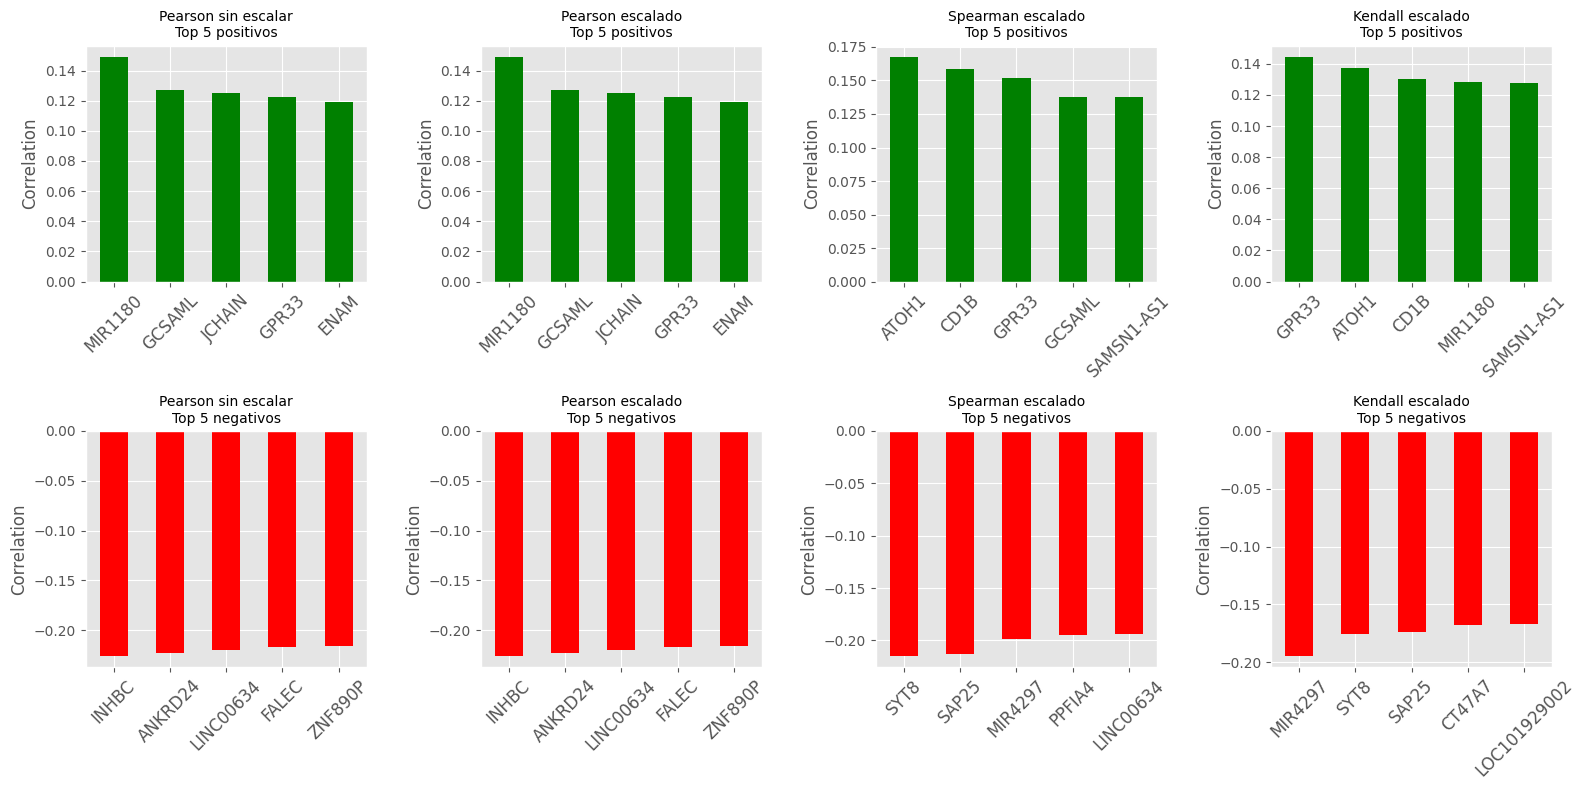

In [43]:
plot_top_correlations(data, target_col="target")


# PCA

In [45]:
data

,target,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,1,1940,3414,280461,504369,17407,352,259,0,9320,...,167117,427430,22765,79222,132973,758,182067,668585,307598,180443
1,1,2389,2504,3863,490369,14123,0,220,48,28966,...,160460,461662,17714,82843,133411,288,82931,658794,333283,141272
2,1,11132,16088,116055,7290188,133197,234,3730,143,144259,...,99997,218272,30082,95000,189045,571,167817,2059903,474270,167492
3,1,1985,892,54065,166961,6662,0,24,0,6558,...,57975,96666,6428,31019,35796,70,46934,236254,70268,64291
4,1,763,2271,18771,62964,4645,0,30,0,1590,...,16072,37712,2293,9069,20857,199,13873,466422,75607,24480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1,3054,2576,115764,493072,11960,8,420,60,13248,...,54171,126283,9542,32394,81350,339,60699,384359,112408,89682
411,1,14310,16644,64124,4883766,99562,251285,3727,149,290478,...,120774,304703,15515,63378,113558,598,176298,1956402,320730,155308
412,1,1202,1498,46430,300920,7610,1814,0,0,7066,...,51039,99020,2962,18191,47548,0,86957,218681,66733,106071
413,1,1774,4890,84582,183976,4557,7118,51,22,2521,...,73787,150409,9795,46086,103497,0,94178,630059,417290,86620


In [44]:
#PCA training
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

# Se extrae el modelo entrenado del pipeline
model_pca = pca_pipe.named_steps['pca']



# array to dataframe to add names.
dat=pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

print(dat)

       target      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
0   -0.000953  0.003915  0.007552  0.007328  0.006029  0.006059  0.000827   
1    0.000879  0.005506  0.005316 -0.003537  0.008941  0.006959  0.002271   
2   -0.000053  0.012637  0.010894 -0.006645  0.017533  0.015033  0.004700   
3   -0.005292  0.012349  0.008846 -0.001483  0.000375  0.004224 -0.001435   
4    0.003559 -0.003886 -0.001003 -0.007264  0.000266 -0.000561  0.005309   
..        ...       ...       ...       ...       ...       ...       ...   
410 -0.071957 -0.006265  0.000392 -0.003641  0.000087  0.001184  0.002219   
411  0.036442  0.000682 -0.000818 -0.004231 -0.000603 -0.000180  0.001684   
412  0.014365 -0.004220 -0.001449  0.000671  0.001441 -0.000122  0.001154   
413  0.022913 -0.007372 -0.007756 -0.000393 -0.000319 -0.000717 -0.000498   
414 -0.108151  0.045522 -0.116165  0.012005  0.135647 -0.026617  0.127972   

        A2MP1   A3GALT2    A4GALT  ...    ZWILCH     ZWINT      ZXDA  \
0  

In [70]:
X = data.drop(columns='target')
y = data['target']

# Ajustar PCA
model_pca = PCA(n_components=10)
pca_res = model_pca.fit_transform(X)

In [72]:
pca_res.shape

(415, 10)

In [73]:
#PCA training
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

# Se extrae el modelo entrenado del pipeline
model_pca = pca_pipe.named_steps['pca']



# array to dataframe to add names.
dat=pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

print(dat)

       target      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
0   -0.000953  0.003915  0.007552  0.007328  0.006029  0.006059  0.000827   
1    0.000879  0.005506  0.005316 -0.003537  0.008941  0.006959  0.002271   
2   -0.000053  0.012637  0.010894 -0.006645  0.017533  0.015033  0.004700   
3   -0.005292  0.012349  0.008846 -0.001483  0.000375  0.004224 -0.001435   
4    0.003559 -0.003886 -0.001003 -0.007264  0.000266 -0.000561  0.005309   
..        ...       ...       ...       ...       ...       ...       ...   
410 -0.071957 -0.006265  0.000392 -0.003641  0.000087  0.001184  0.002219   
411  0.036442  0.000682 -0.000818 -0.004231 -0.000603 -0.000180  0.001684   
412  0.014365 -0.004220 -0.001449  0.000671  0.001441 -0.000122  0.001154   
413  0.022913 -0.007372 -0.007756 -0.000393 -0.000319 -0.000717 -0.000498   
414 -0.108151  0.045522 -0.116165  0.012005  0.135647 -0.026617  0.127972   

        A2MP1   A3GALT2    A4GALT  ...    ZWILCH     ZWINT      ZXDA  \
0  

In [74]:
dat

,target,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,-0.000953,0.003915,0.007552,0.007328,0.006029,0.006059,0.000827,0.004871,0.002524,0.004195,...,0.008558,0.008876,0.008483,0.009146,0.009788,0.002069,0.009310,0.008383,0.008070,0.009264
1,0.000879,0.005506,0.005316,-0.003537,0.008941,0.006959,0.002271,0.014761,0.008756,0.006188,...,-0.001896,-0.006439,0.001403,-0.000647,-0.002028,0.004171,0.006132,-0.001096,0.002604,0.001617
2,-0.000053,0.012637,0.010894,-0.006645,0.017533,0.015033,0.004700,0.012350,0.001653,0.014980,...,-0.001990,-0.004611,-0.001798,-0.001673,-0.001309,0.000999,-0.003961,0.007645,0.003862,-0.004753
3,-0.005292,0.012349,0.008846,-0.001483,0.000375,0.004224,-0.001435,0.001445,-0.000915,-0.000717,...,-0.006798,-0.001397,-0.001227,0.000241,0.003851,0.001442,-0.009557,0.003886,-0.006248,-0.008441
4,0.003559,-0.003886,-0.001003,-0.007264,0.000266,-0.000561,0.005309,-0.006704,-0.006067,0.006452,...,0.004542,0.004214,-0.007484,-0.004610,-0.002317,-0.002243,-0.006827,0.004913,0.007348,-0.005244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,-0.071957,-0.006265,0.000392,-0.003641,0.000087,0.001184,0.002219,-0.002090,0.003466,0.000510,...,-0.000142,0.000631,-0.002388,0.001212,0.000964,0.004471,-0.001858,-0.001911,-0.000896,-0.001915
411,0.036442,0.000682,-0.000818,-0.004231,-0.000603,-0.000180,0.001684,0.004128,0.000963,0.002296,...,0.002874,-0.000236,-0.002202,0.002822,0.002784,-0.007975,-0.000301,0.000978,0.002005,0.002180
412,0.014365,-0.004220,-0.001449,0.000671,0.001441,-0.000122,0.001154,0.001441,-0.001481,0.001233,...,0.005033,0.000930,0.004157,-0.000576,-0.002004,-0.010576,0.000823,0.000308,0.001881,-0.001624
413,0.022913,-0.007372,-0.007756,-0.000393,-0.000319,-0.000717,-0.000498,0.004493,0.013853,-0.000624,...,-0.001786,0.003623,0.002439,-0.000516,-0.000390,0.006491,-0.000088,-0.003183,0.000391,-0.000547


In [82]:
# Guardar el target original antes de dropearlo
target = data['target']  # o data['target'] antes de drop
df = data.drop('target', axis=1)

# Normalizar
data_norm = (df - df.min()) / (df.max() - df.min())

# Concatenar target otra vez
data_norm['target'] = target.values

# Ahora data_norm tiene todas las features normalizadas + la columna target
print(data_norm.head())


       A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1     A2MP1  \
0  0.042521  0.079660  0.679570  0.046288  0.056075  0.000779  0.041222   
1  0.052764  0.056907  0.008674  0.044960  0.045069  0.000000  0.035015   
2  0.252207  0.396550  0.280799  0.690194  0.444153  0.000518  0.593665   
3  0.043548  0.016602  0.130440  0.014272  0.020062  0.000000  0.003820   
4  0.015672  0.051081  0.044833  0.004403  0.013302  0.000000  0.004775   

    A3GALT2    A4GALT     A4GNT  ...     ZWINT      ZXDA      ZXDB      ZXDC  \
0  0.000000  0.017184  0.000000  ...  0.522036  0.238100  0.245267  0.363818   
1  0.065753  0.055905  0.000000  ...  0.564604  0.184456  0.256704  0.365054   
2  0.195890  0.283137  0.018834  ...  0.261951  0.315810  0.295100  0.522003   
3  0.000000  0.011741  0.000000  ...  0.110735  0.064594  0.093026  0.089672   
4  0.000000  0.001949  0.000000  ...  0.037427  0.020678  0.023700  0.047527   

     ZYG11A    ZYG11B       ZYX     ZZEF1      ZZZ3  target  
0  0.0

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

def plot_pca_summary(data, target_col="target", n_components=10):
    """
    Realiza PCA sobre el dataframe con escalamiento previo y genera una figura con:
    1) Heatmap de los primeros n_components componentes PCA (todas las columnas, sin nombres)
    2) Gráfico de varianza acumulada de los componentes
    3) Scatterplot de las dos primeras componentes principales
    """

    if n_components < 1:
        raise ValueError("n_components debe ser >= 1")

    # Separar features y target
    X = data.drop(columns=target_col)
    y = data[target_col]

    # Pipeline: escalado + PCA
    pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=n_components))
    pca_pipe.fit(X)

    # Extraer modelo PCA entrenado
    model_pca = pca_pipe.named_steps['pca']

    # Transformación PCA
    pca_res = model_pca.transform(X)

    # Varianza acumulada
    prop_variance_acum = np.cumsum(model_pca.explained_variance_ratio_)

    # Crear figura 1x3
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
    plt.subplots_adjust(wspace=0.4)

    # ------------------------
    # 1) Heatmap de componentes PCA (todos los genes)
    components = model_pca.components_  # shape: n_components × n_features

    norm = colors.TwoSlopeNorm(vmin=components.min(), vcenter=0, vmax=components.max())
    im = axes[0].imshow(components, cmap='viridis', aspect='auto', norm=norm)

    # Ejes: mostrar solo números de genes, no nombres
    axes[0].set_xticks([0, components.shape[1]-1])
    axes[0].set_xticklabels([1, components.shape[1]])
    axes[0].set_yticks(range(components.shape[0]))
    axes[0].set_yticklabels([f"PC{i+1}" for i in range(components.shape[0])])
    axes[0].set_xlabel("Genes/features")
    axes[0].set_ylabel("Componentes PCA")
    axes[0].set_title(f"PCA Components (primeros {n_components})")
    fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

    # ------------------------
    # 2) Varianza acumulada
    x = np.arange(1, len(prop_variance_acum)+1)
    axes[1].plot(x, prop_variance_acum, marker='o')
    axes[1].set_xlabel("Número de componentes")
    axes[1].set_ylabel("Varianza acumulada")
    axes[1].set_title(f"Varianza acumulada (primeros {n_components})")
    axes[1].grid(True)

    # ------------------------
    # 3) Scatterplot de las dos primeras componentes
    scatter = axes[2].scatter(pca_res[:, 0], pca_res[:, 1], c=y, cmap='viridis')
    axes[2].set_xlabel("Primer componente PCA")
    axes[2].set_ylabel("Segundo componente PCA")
    axes[2].set_title("2D PCA Visualization")
    axes[2].grid(True)
    fig.colorbar(scatter, ax=axes[2], fraction=0.046, pad=0.04, label=target_col)

    plt.show()

    # Imprimir número de componentes necesarios para 95% de varianza
    n_95 = np.argmax(np.cumsum(model_pca.explained_variance_ratio_) >= 0.95) + 1
    print(f"Número de componentes necesarios para explicar 95% de la varianza: {n_95}")

    # Extra: dataframe de componentes con nombres de columnas
    dat = pd.DataFrame(data=model_pca.components_, columns=X.columns)
    print(dat)


c:\python_env\biologia_computacional\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


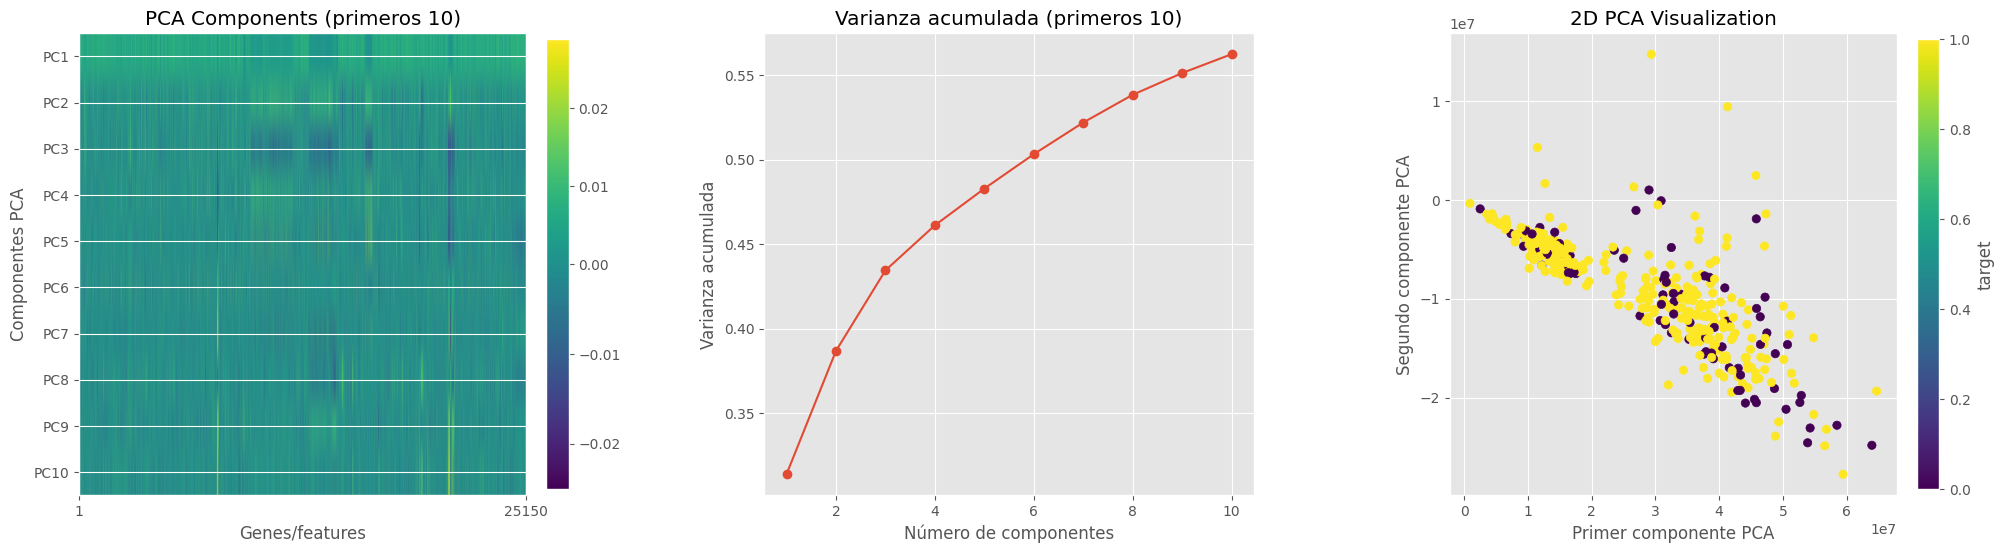

Número de componentes necesarios para explicar 95% de la varianza: 1
       A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1     A2MP1  \
0  0.003915  0.007552  0.007328  0.006029  0.006059  0.000827  0.004871   
1  0.005506  0.005316 -0.003537  0.008941  0.006959  0.002271  0.014761   
2  0.012637  0.010894 -0.006645  0.017533  0.015033  0.004700  0.012350   
3  0.012349  0.008846 -0.001483  0.000375  0.004224 -0.001435  0.001445   
4 -0.003888 -0.001003 -0.007266  0.000264 -0.000562  0.005312 -0.006703   
5  0.005911  0.007112 -0.004005 -0.007209 -0.007726  0.000433  0.000296   
6 -0.001107 -0.004411  0.013342  0.007393  0.002327 -0.000891 -0.001220   
7  0.003151 -0.003432 -0.005592 -0.004438  0.000671  0.005146  0.003800   
8  0.003738  0.008632 -0.010259 -0.000642  0.000418  0.007693  0.001676   
9  0.007591  0.001807 -0.004421  0.004029  0.010697 -0.000248  0.001953   

    A3GALT2    A4GALT     A4GNT  ...    ZWILCH     ZWINT      ZXDA      ZXDB  \
0  0.002524  0.004195  0.

In [76]:
plot_pca_summary(data, target_col="target", n_components=10)


c:\python_env\biologia_computacional\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


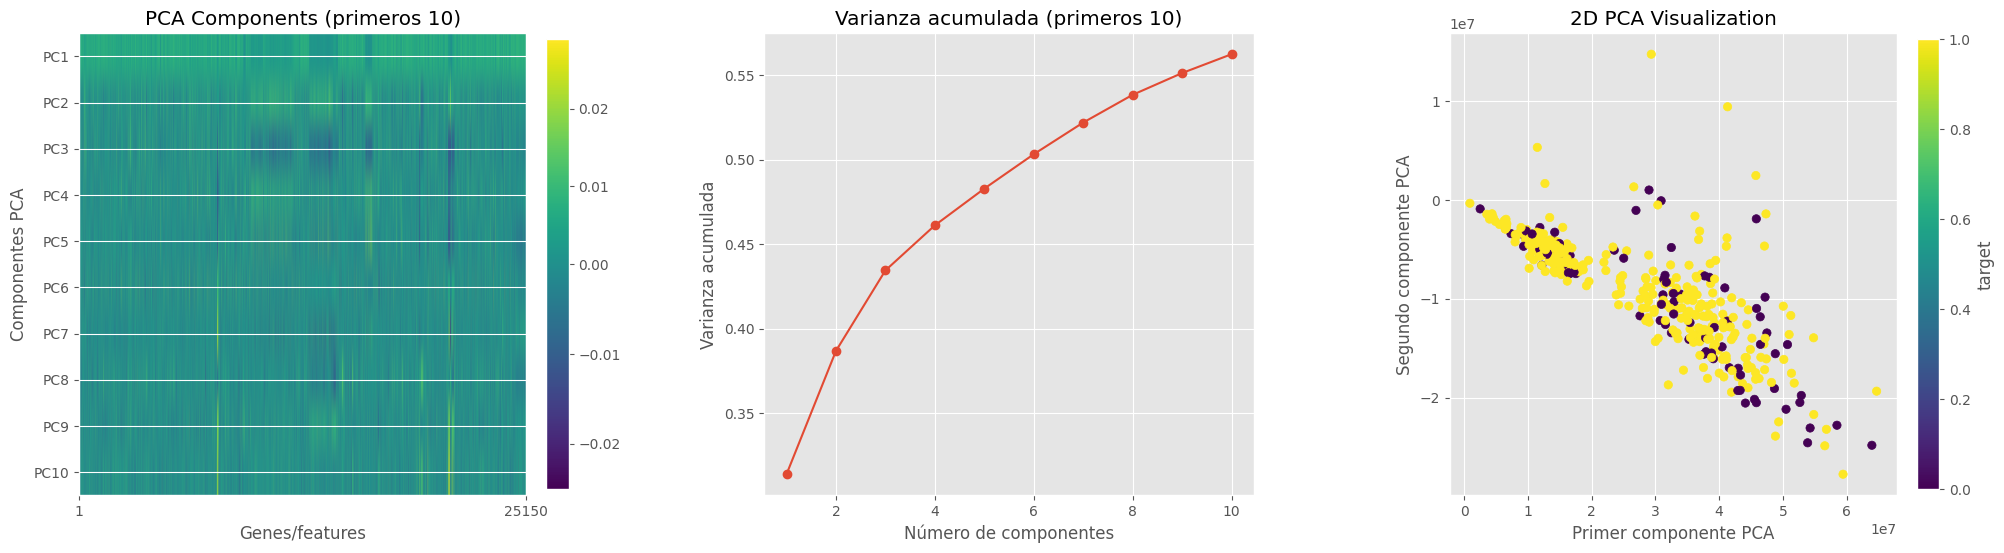

Número de componentes necesarios para explicar 95% de la varianza: 1
       A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1     A2MP1  \
0  0.003915  0.007552  0.007328  0.006029  0.006059  0.000827  0.004871   
1  0.005506  0.005316 -0.003537  0.008941  0.006959  0.002271  0.014761   
2  0.012637  0.010894 -0.006645  0.017533  0.015033  0.004700  0.012350   
3  0.012349  0.008846 -0.001483  0.000375  0.004224 -0.001435  0.001445   
4 -0.003887 -0.001004 -0.007265  0.000265 -0.000561  0.005309 -0.006704   
5  0.005910  0.007111 -0.004004 -0.007208 -0.007725  0.000433  0.000295   
6 -0.001112 -0.004415  0.013352  0.007399  0.002331 -0.000907 -0.001213   
7  0.003146 -0.003431 -0.005591 -0.004435  0.000675  0.005142  0.003808   
8  0.003767  0.008636 -0.010266 -0.000671  0.000372  0.007728  0.001686   
9  0.007577  0.001818 -0.004349  0.003957  0.010662 -0.000182  0.001968   

    A3GALT2    A4GALT     A4GNT  ...    ZWILCH     ZWINT      ZXDA      ZXDB  \
0  0.002524  0.004195  0.

In [83]:
plot_pca_summary(data, target_col="target", n_components=10)
